<a href="https://colab.research.google.com/github/sergi0gs/Marvel_vs_DC/blob/main/Marvel_vs_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In this project we will try to analyse the information about the heroes of Marvel and DC comics learning about the different types of techniques that we have in Python to analyse, clean, transform and visualize data.

The information comes from these datasets in kaggle: https://www.kaggle.com/thec03u5/complete-superhero-dataset, https://www.kaggle.com/claudiodavi/superhero-set

Which was constructed using web scrapping tecniques from the next website: https://www.superherodb.com/.

Alse we use as a guide the next example maked in R from: https://cosmoduende.medium.com/dc-comics-vs-marvel-comics-an%C3%A1lisis-exploratorio-y-visualizaci%C3%B3n-de-datos-con-r-b0cf565e44e2

# **What do we want to know?**
1. How many characters are there in DC Comics and Marvel Comics?
2. What is the predominant gender in the characters of DC Comics and Marvel Comics?
3. What is the predominant race in both comics?
4.   Which has more Heroes or Villains?
5.   Realize a comparative between the character abilites of both comics.
6.   Who are the most intelligent characters?
7.   Who are the strongest characters?
8.   Who are the fastest characters?
9.   Who are the characters with more power?
10. What superpowers predominate in the characters of DC Comics and Marvel Comics?





# Data Exploration

## Import libraries

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read files

In [102]:
superhero = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Marvel_vs_DC/main/datasets/SuperheroDataset.csv')
heroes_information = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Marvel_vs_DC/main/datasets/heroes_information.csv')
super_hero_powers = pd.read_csv('https://raw.githubusercontent.com/sergi0gs/Marvel_vs_DC/main/datasets/super_hero_powers.csv')

## Data Shape

### SuperHero.csv

In [103]:
superhero.shape

(743, 29)

### heroes_information.csv

In [104]:
heroes_information.shape

(734, 11)

### super_hero_powers.csv


In [105]:
super_hero_powers.shape

(667, 168)

## Information

### SuperHero.csv

In [106]:
superhero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        743 non-null    int64  
 1   Unnamed: 0.1      743 non-null    int64  
 2   Name              743 non-null    object 
 3   Url               743 non-null    object 
 4   Intelligence      665 non-null    float64
 5   Strength          665 non-null    float64
 6   Speed             665 non-null    float64
 7   Durability        665 non-null    float64
 8   Power             665 non-null    float64
 9   Combat            665 non-null    float64
 10  Full name         743 non-null    object 
 11  Alter Egos        743 non-null    object 
 12  Aliases           743 non-null    object 
 13  Place of birth    743 non-null    object 
 14  First appearance  743 non-null    object 
 15  Creator           735 non-null    object 
 16  Alignment         743 non-null    object 
 1

In [107]:
superhero.sample(5)

,Unnamed: 0,Unnamed: 0.1,Name,Url,Intelligence,Strength,Speed,Durability,Power,Combat,Full name,Alter Egos,Aliases,Place of birth,First appearance,Creator,Alignment,Gender,Race,Height,Weight,Eye color,Hair color,Occupation,Base,Team Affiliation,Relatives,Skin color,Total Power
74,74,74,Beak,/beak/10-232/,NaN,NaN,NaN,NaN,NaN,NaN,Barnell Bohusk,No alter egos found.,Blackwing,"Cheverly, Maryland",-,Marvel Comics,good,Male,-,5'9 // 175 cm,140 lb // 63 kg,Black,White,-,-,"Formerly: X-Men, New Warriors","Charles (father), Kathy (mother), Angel Salvad...",NaN,0.0
7,7,7,Adam Monroe,/adam-monroe/10-1026/,85.0,10.0,15.0,100.0,100.0,65.0,-,No alter egos found.,"Takezo Kensei, Richard Sanders",-,Heroes S02E01 - Four Months Later...,NBC - Heroes,good,Male,-,- // 0 cm,- lb // 0 kg,Blue,Blond,"former samurai swordsman, former British merce...","U.S.; formerly Diedenshausen, Germany; Milan, ...",No team connections added yet.,-,NaN,375.0
19,19,19,Amazo,/amazo/10-1390/,85.0,100.0,85.0,100.0,100.0,100.0,-,No alter egos found.,"Professor Ivos Amazing Android, Timazo, Humazo...",-,"Brave and the Bold #30 (July, 1960)",DC Comics,bad,Male,Android,8'5 // 257 cm,385 lb // 173 kg,Red,-,-,-,"Formerly: Secret Society of Super-Villains, Th...","Professor Ivo (creator), Kid Amazo (cyborg off...",NaN,570.0
167,167,167,Century,/century/10-1511/,95.0,80.0,55.0,65.0,100.0,100.0,-,No alter egos found.,-,-,"Force Works #1 (July, 1994)",Marvel Comics,good,Male,Alien,6'7 // 201 cm,215 lb // 97 kg,White,White,"Tracker, adventurer",-,No team connections added yet.,-,Grey,495.0
11,11,11,Agent Zero,/agent-zero/10-396/,90.0,30.0,40.0,80.0,75.0,95.0,Christoph Nord,No alter egos found.,Maverick,Unrevealed location in former East Germany,-,Marvel Comics,good,Male,-,6'3 // 191 cm,230 lb // 104 kg,-,-,"Mercenary, former government operative, freedo...",-,"A.R.M.O.R., Wrecking Crew","Unidentified parents (deceased), Andreas Nord ...",NaN,410.0


### heroes_information.csv

In [108]:
heroes_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


In [109]:
heroes_information.sample(5)

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
523,523,Poison Ivy,Female,green,Human,Red,168.0,DC Comics,green,bad,50.0
645,645,Supergirl,Female,blue,Kryptonian,Blond,165.0,DC Comics,-,good,54.0
125,125,Blue Beetle III,Male,brown,Human,Black,-99.0,DC Comics,-,good,-99.0
390,390,King Shark,Male,black,Animal,No Hair,-99.0,DC Comics,-,bad,-99.0
471,471,Moonstone,Female,blue,-,Blond,180.0,Marvel Comics,-,bad,59.0


### super_hero_powers.csv

In [110]:
super_hero_powers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [111]:
super_hero_powers.sample(5)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
551,Simon Baz,True,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
609,Thunderstrike,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
435,Mysterio,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
65,Beak,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
281,Hawkeye II,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Null Values

### SuperHero.csv

In [112]:
superhero.isnull().sum()

Unnamed: 0            0
Unnamed: 0.1          0
Name                  0
Url                   0
Intelligence         78
Strength             78
Speed                78
Durability           78
Power                78
Combat               78
Full name             0
Alter Egos            0
Aliases               0
Place of birth        0
First appearance      0
Creator               8
Alignment             0
Gender                0
Race                  0
Height                0
Weight                0
Eye color             0
Hair color            0
Occupation            0
Base                  0
Team Affiliation      0
Relatives             0
Skin color          669
Total Power           0
dtype: int64

### heroes_information.csv

In [113]:
heroes_information.isnull().sum()


Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

### super_hero_powers.csv

In [114]:
super_hero_powers.isnull().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
                        ..
Phoenix Force            0
Molecular Dissipation    0
Vision - Cryo            0
Omnipresent              0
Omniscient               0
Length: 168, dtype: int64

In [115]:
super_hero_powers.isnull().sum().sum()

0

## Duplicates

### SuperHero.csv

In [116]:
superhero.duplicated().sum()

0

### heroes_information.csv

In [117]:
heroes_information.duplicated().sum()


0

### super_hero_powers.csv

In [118]:
super_hero_powers.duplicated().sum()

0

# Data Cleaning

## SuperHero.csv

**Step 1:** Eliminate unnecessary columns like: "Skin color","Unnamed: 0", "Unnamed: 0.1",'Url','Full name,'Alter Egos','Aliases','Place of birth','Eye color','Hair color','Occupation','Base','Team Affiliation','Relatives'


In [119]:
superhero_clean = superhero.copy(deep = True)
superhero_clean.drop(columns = ['Skin color','Unnamed: 0', 'Unnamed: 0.1','Url','Full name','Alter Egos','Aliases',
                                'Place of birth','Height','Weight','Eye color','Hair color','Occupation','Base','Team Affiliation','Relatives','First appearance'], inplace=True)
superhero_clean

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0
2,Abe Sapien,95.0,30.0,35.0,65.0,100.0,85.0,Dark Horse Comics,good,Male,Icthyo Sapien,410.0
3,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0
4,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...
738,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0
739,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0
740,Yoda,95.0,55.0,35.0,25.0,100.0,90.0,George Lucas,good,Male,Yoda's species,400.0
741,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0


**Step 2:** Filter by comics

Count the number of values in Marvel Comics and DC Comics

In [120]:
superhero_clean['Creator'].value_counts()

Marvel Comics        395
DC Comics            219
NBC - Heroes          19
Dark Horse Comics     19
George Lucas          15
Image Comics          14
Star Trek              6
HarperCollins          6
Team Epic TV           5
SyFy                   5
Shueisha               4
Icon Comics            4
ABC Studios            4
IDW Publishing         4
Wildstorm              4
Sony Pictures          2
Mattel                 2
Ian Fleming            1
Universal Studios      1
Rebellion              1
South Park             1
J. K. Rowling          1
Hanna-Barbera          1
J. R. R. Tolkien       1
Microsoft              1
Name: Creator, dtype: int64

Marvale Comics + DC Comics = 614

In [121]:
filter_sh = (superhero_clean['Creator'] == 'Marvel Comics') | (superhero_clean['Creator'] == 'DC Comics') 
superhero_clean = superhero_clean[filter_sh]
superhero_clean

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0
3,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0
4,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0
5,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
737,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0
738,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0
739,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0
741,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0


We can see that the result is 614 rows so we do it well.

## heroes_information.csv

**Step 1:** Eliminate 'Unnamed: 0','Hair color','Height','Skin color','Height','Weight'


In [122]:
heroes_information_clean = heroes_information.copy(deep = True)
heroes_information_clean.drop(columns = ['Unnamed: 0','Eye color','Hair color','Height','Skin color','Height','Weight'], inplace = True)
heroes_information_clean

,name,Gender,Race,Publisher,Alignment
0,A-Bomb,Male,Human,Marvel Comics,good
1,Abe Sapien,Male,Icthyo Sapien,Dark Horse Comics,good
2,Abin Sur,Male,Ungaran,DC Comics,good
3,Abomination,Male,Human / Radiation,Marvel Comics,bad
4,Abraxas,Male,Cosmic Entity,Marvel Comics,bad
...,...,...,...,...,...
729,Yellowjacket II,Female,Human,Marvel Comics,good
730,Ymir,Male,Frost Giant,Marvel Comics,good
731,Yoda,Male,Yoda's species,George Lucas,good
732,Zatanna,Female,Human,DC Comics,good


**Step 2** : Filter by comics.


In [123]:
filter_hi = (heroes_information_clean['Publisher'] == 'Marvel Comics') | (heroes_information_clean['Publisher'] == 'DC Comics') 
heroes_information_clean = heroes_information_clean[filter_hi]
heroes_information_clean

,name,Gender,Race,Publisher,Alignment
0,A-Bomb,Male,Human,Marvel Comics,good
2,Abin Sur,Male,Ungaran,DC Comics,good
3,Abomination,Male,Human / Radiation,Marvel Comics,bad
4,Abraxas,Male,Cosmic Entity,Marvel Comics,bad
5,Absorbing Man,Male,Human,Marvel Comics,bad
...,...,...,...,...,...
728,Yellowjacket,Male,Human,Marvel Comics,good
729,Yellowjacket II,Female,Human,Marvel Comics,good
730,Ymir,Male,Frost Giant,Marvel Comics,good
732,Zatanna,Female,Human,DC Comics,good


**Step 3:** Check the filter

In [124]:
heroes_information_clean['Publisher'].unique()

array(['Marvel Comics', 'DC Comics'], dtype=object)

## super_hero_powers.csv



We need to transform the data in a long format to visualize it better.

**Step 1:** Obtain all the columns as a list

In [125]:
super_hero_powers_clean = super_hero_powers.copy(deep = True)
shpc_columns = list(super_hero_powers_clean.columns)
shpc_columns

['hero_names',
 'Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Trans

**Step 2:** Eliminate the first value

In [126]:
shpc_columns.remove('hero_names')
shpc_columns


['Agility',
 'Accelerated Healing',
 'Lantern Power Ring',
 'Dimensional Awareness',
 'Cold Resistance',
 'Durability',
 'Stealth',
 'Energy Absorption',
 'Flight',
 'Danger Sense',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Power Augmentation',
 'Animal Attributes',
 'Longevity',
 'Intelligence',
 'Super Strength',
 'Cryokinesis',
 'Telepathy',
 'Energy Armor',
 'Energy Blasts',
 'Duplication',
 'Size Changing',
 'Density Control',
 'Stamina',
 'Astral Travel',
 'Audio Control',
 'Dexterity',
 'Omnitrix',
 'Super Speed',
 'Possession',
 'Animal Oriented Powers',
 'Weapon-based Powers',
 'Electrokinesis',
 'Darkforce Manipulation',
 'Death Touch',
 'Teleportation',
 'Enhanced Senses',
 'Telekinesis',
 'Energy Beams',
 'Magic',
 'Hyperkinesis',
 'Jump',
 'Clairvoyance',
 'Dimensional Travel',
 'Power Sense',
 'Shapeshifting',
 'Peak Human Condition',
 'Immortality',
 'Camouflage',
 'Element Control',
 'Phasing',
 'Astral Projection',
 'Electrical Transport',
 'Fire C

**Step 3:** Melt the data to transform it to a long format

In [127]:
sphc_melt = pd.melt(super_hero_powers_clean, id_vars='hero_names',value_vars = shpc_columns)
sphc_melt

,hero_names,variable,value
0,3-D Man,Agility,True
1,A-Bomb,Agility,False
2,Abe Sapien,Agility,True
3,Abin Sur,Agility,False
4,Abomination,Agility,False
...,...,...,...
111384,Yellowjacket II,Omniscient,False
111385,Ymir,Omniscient,False
111386,Yoda,Omniscient,False
111387,Zatanna,Omniscient,False


**Step 4:** Filter with True Value

In [128]:
filter_sphc = sphc_melt['value'] == True
sphc_melt = sphc_melt[filter_sphc]
sphc_melt

,hero_names,variable,value
0,3-D Man,Agility,True
2,Abe Sapien,Agility,True
12,Ajax,Agility,True
14,Alex Mercer,Agility,True
16,Alien,Agility,True
...,...,...,...
109472,Bizarro-Girl,Vision - Cryo,True
110443,Man of Miracles,Omnipresent,True
110510,One-Above-All,Omnipresent,True
111110,Man of Miracles,Omniscient,True


**Step 5:** Group by "hero_names"

In [129]:
sphc_melt = sphc_melt.groupby('hero_names')['variable'].apply(list).reset_index()
sphc_melt

,hero_names,variable
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
663,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


**Step 6:** Change name columns "variable" to "super_power"



In [130]:
sphc_melt.rename(columns={'variable':'super_powers'},inplace=True)
sphc_melt

,hero_names,super_powers
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
...,...,...
662,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
663,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


## Cross information and create only one dataframe

### Join SuperHero and Heroes information

Left: SuperHero (614 rows)

Right: heroes_information (603 rows)

Use Left Join because superhero_clean have more rows

In [131]:
data_join = pd.merge(superhero_clean, heroes_information_clean, how = 'left', left_on= 'Name', right_on= 'name')
data_join

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment_x,Gender_x,Race_x,Total Power,name,Gender_y,Race_y,Publisher,Alignment_y
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,NaN,NaN,NaN,NaN,NaN
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,A-Bomb,Male,Human,Marvel Comics,good
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,Abin Sur,Male,Ungaran,DC Comics,good
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,Abomination,Male,Human / Radiation,Marvel Comics,bad
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,Abraxas,Male,Cosmic Entity,Marvel Comics,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,Yellowjacket,Male,Human,Marvel Comics,good
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,Yellowjacket II,Female,Human,Marvel Comics,good
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,Ymir,Male,Frost Giant,Marvel Comics,good
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,Zatanna,Female,Human,DC Comics,good


#### Check null values and drop unnecessary columns

In [132]:
data_join.isnull().sum()

Name             0
Intelligence    66
Strength        66
Speed           66
Durability      66
Power           66
Combat          66
Creator          0
Alignment_x      0
Gender_x         0
Race_x           0
Total Power      0
name            18
Gender_y        18
Race_y          18
Publisher       18
Alignment_y     18
dtype: int64

Drop: 'name','Gender_y','Race_y','Publisher','Alignment_y'

In [133]:
data_join.drop(columns=['name','Gender_y','Race_y','Publisher','Alignment_y'], inplace=True)
data_join

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment_x,Gender_x,Race_x,Total Power
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0


Change the name of columns with "_x" in its names.

In [134]:
data_join.rename(columns={'Alignment_x':'Alignment','Gender_x':'Gender','Race_x':'Race'}, inplace= True)
data_join

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0


### Left join between "data_join" and "super_hero_powers_clean"

Left: data_join (653 rows)

Right: shpc_melt (667 rows)

In [135]:
data_join_2 = pd.merge(data_join,sphc_melt,how='left',left_on='Name',right_on='hero_names')
data_join_2

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,hero_names,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,Abin Sur,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,Abraxas,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,Yellowjacket,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,Yellowjacket II,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,Ymir,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,Zatanna,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


#### Check null values and drop unnecessary columns

In [136]:
data_join_2.isnull().sum()

Name             0
Intelligence    66
Strength        66
Speed           66
Durability      66
Power           66
Combat          66
Creator          0
Alignment        0
Gender           0
Race             0
Total Power      0
hero_names      89
super_powers    89
dtype: int64

Compare between Name and null values of hero_names

In [137]:
data_join_2[data_join_2['hero_names'].isnull()]

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,hero_names,super_powers
7,Agent 13,80.0,40.0,45.0,50.0,45.0,85.0,Marvel Comics,good,Female,-,345.0,NaN,NaN
12,Alfred Pennyworth,85.0,10.0,20.0,10.0,10.0,55.0,DC Comics,good,Male,Human,190.0,NaN,NaN
36,Arsenal,80.0,55.0,60.0,60.0,65.0,85.0,DC Comics,good,Male,Human,405.0,NaN,NaN
60,Batgirl III,80.0,65.0,70.0,70.0,65.0,90.0,DC Comics,good,Female,-,440.0,NaN,NaN
62,Batgirl V,NaN,NaN,NaN,NaN,NaN,NaN,DC Comics,good,Female,-,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,White Queen,80.0,45.0,45.0,70.0,65.0,45.0,Marvel Comics,good,Female,-,350.0,NaN,NaN
637,Wiz Kid,NaN,NaN,NaN,NaN,NaN,NaN,Marvel Comics,good,-,-,0.0,NaN,NaN
643,Wondra,NaN,NaN,NaN,NaN,NaN,NaN,Marvel Comics,good,Female,-,0.0,NaN,NaN
644,Wyatt Wingfoot,60.0,10.0,15.0,5.0,5.0,60.0,Marvel Comics,good,Male,-,155.0,NaN,NaN


Drop "hero_names"


In [138]:
data_join_2.drop(columns=['hero_names'], inplace = True)
data_join_2

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


Replace null values of "super_powers" by a "Empty"

In [144]:
data_join_2.fillna(data_join_2.median(),inplace = True)
data_join_2

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


Check null values

In [146]:
data_join_2.isnull().sum()

Name             0
Intelligence     0
Strength         0
Speed            0
Durability       0
Power            0
Combat           0
Creator          0
Alignment        0
Gender           0
Race             0
Total Power      0
super_powers    89
dtype: int64

Change null values of superpowers for "Empty"

In [147]:
data_join_2.fillna("Empty",inplace = True)
data_join_2

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


Check null values

In [148]:
data_join_2.isnull().sum()

Name            0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Creator         0
Alignment       0
Gender          0
Race            0
Total Power     0
super_powers    0
dtype: int64

### Our final dataframe

In [149]:
final_df = data_join_2.copy(deep=True)
final_df

,Name,Intelligence,Strength,Speed,Durability,Power,Combat,Creator,Alignment,Gender,Race,Total Power,super_powers
0,3-D Man,80.0,35.0,45.0,35.0,25.0,55.0,Marvel Comics,good,Male,-,275.0,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,75.0,100.0,20.0,80.0,25.0,65.0,Marvel Comics,good,Male,Human,365.0,"[Accelerated Healing, Durability, Longevity, S..."
2,Abin Sur,80.0,90.0,55.0,65.0,100.0,65.0,DC Comics,good,Male,Ungaran,455.0,[Lantern Power Ring]
3,Abomination,85.0,80.0,55.0,90.0,65.0,95.0,Marvel Comics,bad,Male,Human / Radiation,470.0,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,100.0,100.0,85.0,100.0,100.0,55.0,Marvel Comics,bad,Male,Cosmic Entity,540.0,"[Dimensional Awareness, Flight, Intelligence, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Yellowjacket,95.0,10.0,15.0,30.0,15.0,15.0,Marvel Comics,good,Male,Human,180.0,"[Size Changing, Animal Oriented Powers]"
649,Yellowjacket II,80.0,10.0,35.0,30.0,35.0,30.0,Marvel Comics,good,Female,Human,220.0,"[Flight, Energy Blasts, Size Changing]"
650,Ymir,80.0,100.0,30.0,100.0,100.0,30.0,Marvel Comics,good,Male,Frost Giant,440.0,"[Cold Resistance, Durability, Longevity, Super..."
651,Zatanna,95.0,10.0,25.0,30.0,100.0,60.0,DC Comics,good,Female,Human,320.0,"[Cryokinesis, Telepathy, Magic, Fire Control, ..."


# Questions

Q1. How many heroes are there in DC Comics and Marvel Comics?


In [157]:
q1 = final_df['Creator']
q1.value_counts()

Marvel Comics    419
DC Comics        234
Name: Creator, dtype: int64

Text(0, 0.5, 'Nro.')

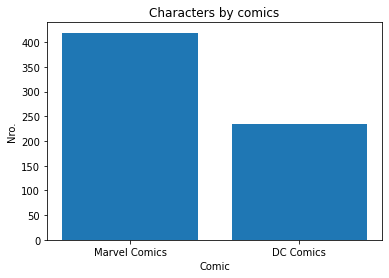

In [159]:
fig,ax = plt.subplots()
ax.bar(q1.value_counts().index, q1.value_counts())
ax.set_title('Characters by comics')
ax.set_xlabel('Comic')
ax.set_ylabel('Nro.')